In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings("ignore")


Read all files

In [3]:
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')
pp=pd.read_csv('Patient_Profile.csv')
onehc=pd.read_csv('First_Health_Camp_Attended.csv')
twohc=pd.read_csv('Second_Health_Camp_Attended.csv')
threehc=pd.read_csv('Third_Health_Camp_Attended.csv')
hcd=pd.read_csv('Health_Camp_Detail.csv')

First working on HCD file (health_Camp_Detail)

In [4]:
hcd

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,6560,16-Aug-03,20-Aug-03,First,B,2
1,6530,16-Aug-03,28-Oct-03,First,C,2
2,6544,03-Nov-03,15-Nov-03,First,F,1
3,6585,22-Nov-03,05-Dec-03,First,E,2
4,6561,30-Nov-03,18-Dec-03,First,E,1
...,...,...,...,...,...,...
60,6556,09-Nov-06,15-Dec-06,First,E,2
61,6551,13-Nov-06,18-Nov-06,Second,D,2
62,6559,11-Dec-06,12-Mar-07,First,F,2
63,6567,30-Jan-07,04-Feb-07,Second,D,2


 Get the information about the Data

In [5]:
hcd.describe()

,Health_Camp_ID,Category3
count,65.00000,65.000000
mean,6555.00000,1.953846
std,18.90767,0.211451
min,6523.00000,1.000000
25%,6539.00000,2.000000
50%,6555.00000,2.000000
75%,6571.00000,2.000000
max,6587.00000,2.000000


In [6]:
hcd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Health_Camp_ID   65 non-null     int64 
 1   Camp_Start_Date  65 non-null     object
 2   Camp_End_Date    65 non-null     object
 3   Category1        65 non-null     object
 4   Category2        65 non-null     object
 5   Category3        65 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 3.2+ KB


In [7]:
hcd.dtypes

Health_Camp_ID      int64
Camp_Start_Date    object
Camp_End_Date      object
Category1          object
Category2          object
Category3           int64
dtype: object

 Get first 10 Rows of a Dataset

In [8]:
hcd.head(10)

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,6560,16-Aug-03,20-Aug-03,First,B,2
1,6530,16-Aug-03,28-Oct-03,First,C,2
2,6544,03-Nov-03,15-Nov-03,First,F,1
3,6585,22-Nov-03,05-Dec-03,First,E,2
4,6561,30-Nov-03,18-Dec-03,First,E,1
5,6581,07-Dec-03,13-Jun-04,First,F,2
6,6564,17-Dec-03,11-Jun-04,First,C,2
7,6557,04-Jan-04,09-Jan-04,First,C,2
8,6538,09-Jan-04,04-Feb-05,First,F,2
9,6546,09-Jan-04,17-Jan-04,First,E,2


Data preprocessing to check if ther is any null values availabe

In [9]:
hcd.isnull().sum()



Health_Camp_ID     0
Camp_Start_Date    0
Camp_End_Date      0
Category1          0
Category2          0
Category3          0
dtype: int64

Column Camp_Start and Camp_End_Date was in object format so changing it to Datetime format and checking  the data information again to verify the data type.

In [10]:
hcd.Camp_Start_Date = pd.to_datetime(hcd.Camp_Start_Date)


In [11]:
hcd.Camp_End_Date = pd.to_datetime(hcd.Camp_End_Date)

In [12]:
hcd

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,6560,2003-08-16,2003-08-20,First,B,2
1,6530,2003-08-16,2003-10-28,First,C,2
2,6544,2003-11-03,2003-11-15,First,F,1
3,6585,2003-11-22,2003-12-05,First,E,2
4,6561,2003-11-30,2003-12-18,First,E,1
...,...,...,...,...,...,...
60,6556,2006-11-09,2006-12-15,First,E,2
61,6551,2006-11-13,2006-11-18,Second,D,2
62,6559,2006-12-11,2007-03-12,First,F,2
63,6567,2007-01-30,2007-02-04,Second,D,2


In [13]:
hcd.dtypes

Health_Camp_ID              int64
Camp_Start_Date    datetime64[ns]
Camp_End_Date      datetime64[ns]
Category1                  object
Category2                  object
Category3                   int64
dtype: object

 Use Value Count function in Healt_Camp_ID

In [14]:
hcd['Health_Camp_ID'].value_counts()

6560    1
6587    1
6555    1
6543    1
6537    1
       ..
6523    1
6524    1
6527    1
6554    1
6577    1
Name: Health_Camp_ID, Length: 65, dtype: int64

Fetching Camps by quarter , month , day by lambda function

In [15]:
hcd['Camp_Start_Month'] =hcd['Camp_Start_Date'].apply(lambda x:x.month)
hcd['Camp_Start_Day']=hcd['Camp_Start_Date'].apply(lambda x:x.day)
hcd['Camp_Start_Quarter']=hcd['Camp_Start_Date'].apply(lambda x:x.quarter)

In [16]:
hcd['Camp_End_Month']=hcd['Camp_End_Date'].apply(lambda x:x.month)
hcd['Camp_End_Day']=hcd['Camp_End_Date'].apply(lambda x:x.day)
hcd['Camp_End_Quarter']=hcd['Camp_End_Date'].apply(lambda x:x.quarter)

In [17]:
hcd['Camp_Duration']=(hcd['Camp_End_Date']-hcd['Camp_Start_Date']).astype('timedelta64[D]')

In [18]:
hcd.head(10)

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Camp_Start_Month,Camp_Start_Day,Camp_Start_Quarter,Camp_End_Month,Camp_End_Day,Camp_End_Quarter,Camp_Duration
0,6560,2003-08-16,2003-08-20,First,B,2,8,16,3,8,20,3,4.0
1,6530,2003-08-16,2003-10-28,First,C,2,8,16,3,10,28,4,73.0
2,6544,2003-11-03,2003-11-15,First,F,1,11,3,4,11,15,4,12.0
3,6585,2003-11-22,2003-12-05,First,E,2,11,22,4,12,5,4,13.0
4,6561,2003-11-30,2003-12-18,First,E,1,11,30,4,12,18,4,18.0
5,6581,2003-12-07,2004-06-13,First,F,2,12,7,4,6,13,2,189.0
6,6564,2003-12-17,2004-06-11,First,C,2,12,17,4,6,11,2,177.0
7,6557,2004-01-04,2004-01-09,First,C,2,1,4,1,1,9,1,5.0
8,6538,2004-01-09,2005-02-04,First,F,2,1,9,1,2,4,1,392.0
9,6546,2004-01-09,2004-01-17,First,E,2,1,9,1,1,17,1,8.0


camps by quarter (form of EDA Barplotting)

<AxesSubplot:xlabel='Camp_Start_Quarter', ylabel='Camp_End_Quarter'>

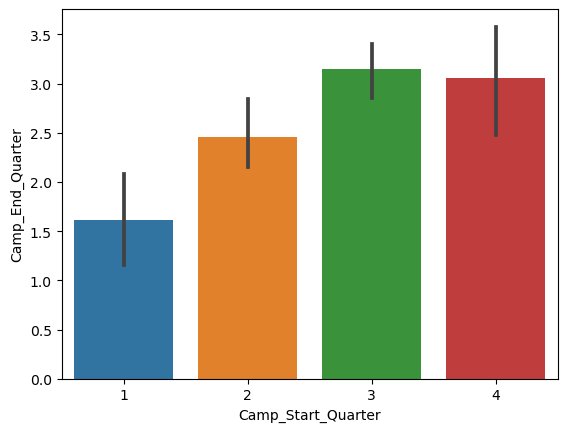

In [21]:
sns.barplot(data=hcd,x='Camp_Start_Quarter',y='Camp_End_Quarter')

camps by month (form of EDA Barplotting)

<AxesSubplot:xlabel='Camp_Start_Month', ylabel='Camp_End_Month'>

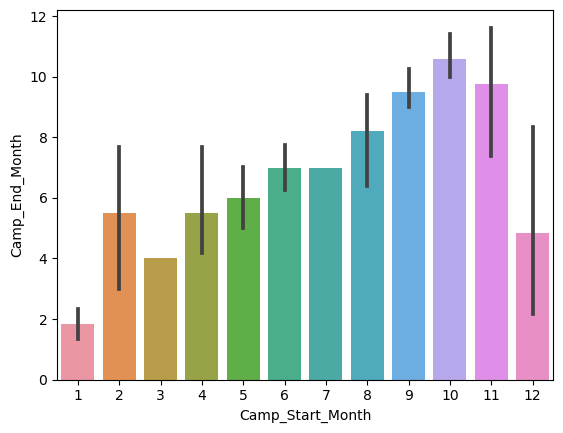

In [22]:
sns.barplot(data=hcd,x='Camp_Start_Month',y='Camp_End_Month')

 camp duration distribution (Use Boxplot for finding out the outliers)

<AxesSubplot:xlabel='Camp_Duration'>

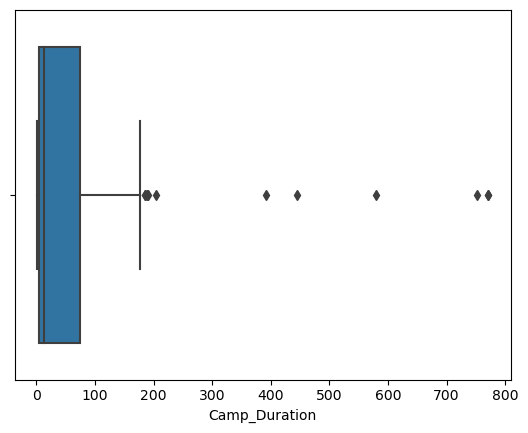

In [24]:
sns.boxplot(data=hcd,x = 'Camp_Duration')

Reading the Patient profile file 

In [25]:
pp

,Patient_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,516956,0,0,0,0,1,90,39,18-Jun-03,NaN,Software Industry
1,507733,0,0,0,0,1,None,40,20-Jul-03,H,Software Industry
2,508307,0,0,0,0,3,87,46,02-Nov-02,D,BFSI
3,512612,0,0,0,0,1,75,47,02-Nov-02,D,Education
4,521075,0,0,0,0,3,None,80,24-Nov-02,H,Others
...,...,...,...,...,...,...,...,...,...,...,...
37628,518600,0,0,0,0,None,None,None,28-Jan-07,NaN,NaN
37629,509515,0,0,0,0,None,None,None,27-Jan-07,NaN,NaN
37630,510713,0,0,0,0,None,None,None,01-Feb-07,H,NaN
37631,493667,0,0,0,0,None,None,None,27-Jan-07,NaN,NaN


Checking the Data distribution with value counts according to the Social Media interactions like FB,Twitter etc

In [26]:
pp.value_counts('Facebook_Shared')

Facebook_Shared
0    36747
1      886
dtype: int64

In [27]:
pp.value_counts('Twitter_Shared')

Twitter_Shared
0    36820
1      813
dtype: int64

In [28]:
pp.value_counts('LinkedIn_Shared')

LinkedIn_Shared
0    36614
1     1019
dtype: int64

Once get the Data Distribution done drop those social media columns from Profile Dataset

In [29]:
pp.drop(['LinkedIn_Shared','Facebook_Shared','Twitter_Shared'],axis=1,inplace=True)

In [30]:
pp

,Patient_ID,Online_Follower,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,516956,0,1,90,39,18-Jun-03,NaN,Software Industry
1,507733,0,1,None,40,20-Jul-03,H,Software Industry
2,508307,0,3,87,46,02-Nov-02,D,BFSI
3,512612,0,1,75,47,02-Nov-02,D,Education
4,521075,0,3,None,80,24-Nov-02,H,Others
...,...,...,...,...,...,...,...,...
37628,518600,0,None,None,None,28-Jan-07,NaN,NaN
37629,509515,0,None,None,None,27-Jan-07,NaN,NaN
37630,510713,0,None,None,None,01-Feb-07,H,NaN
37631,493667,0,None,None,None,27-Jan-07,NaN,NaN


Analyze City type column

In [37]:
pp.sort_values('City_Type')

,Patient_ID,Online_Follower,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
14857,524826,0,None,None,None,29-Sep-05,A,NaN
36393,485961,0,None,None,None,22-Sep-06,A,NaN
20179,501261,0,None,None,None,08-Jul-06,A,NaN
13233,503698,0,None,None,None,01-Jul-05,A,NaN
20190,489867,0,None,None,None,09-Jul-06,A,NaN
...,...,...,...,...,...,...,...,...
37627,502431,0,None,None,None,28-Jan-07,NaN,NaN
37628,518600,0,None,None,None,28-Jan-07,NaN,NaN
37629,509515,0,None,None,None,27-Jan-07,NaN,NaN
37631,493667,0,None,None,None,27-Jan-07,NaN,NaN


In [38]:
pp.dtypes

Patient_ID            int64
Online_Follower       int64
Income               object
Education_Score      object
Age                  object
First_Interaction    object
City_Type            object
Employer_Category    object
dtype: object

In [39]:
pp.City_Type.value_counts()

B    2662
H    2517
A    1729
D    1704
G    1352
E    1217
C    1216
I    1036
F     816
Name: City_Type, dtype: int64

In [42]:
pp.City_Type.isnull().sum()

23384

Check for null values in the dataset if is there any fill the same with median in case of integer and in case of string replace it with some other string value

In [43]:
pp.isnull().sum()

Patient_ID               0
Online_Follower          0
Income                   0
Education_Score          0
Age                      0
First_Interaction        0
City_Type            23384
Employer_Category    34793
dtype: int64

In [46]:
pp.City_Type = pp.City_Type.fillna('Unknown')

In [47]:
pp.Employer_Category = pp.Employer_Category.fillna('Unknown')

In [48]:
pp.isnull().sum()

Patient_ID           0
Online_Follower      0
Income               0
Education_Score      0
Age                  0
First_Interaction    0
City_Type            0
Employer_Category    0
dtype: int64

In [ ]:
End